Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully.
First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 7

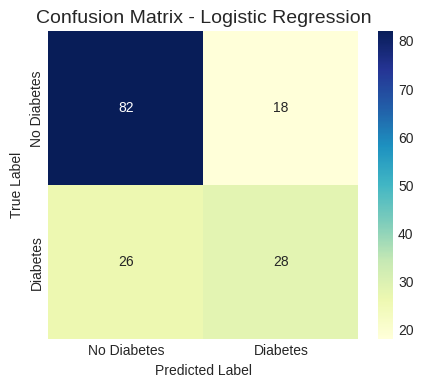

Confusion Matrix for Logistic Regression:

[[82 18]
 [26 28]]


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


----------------------------------------

--- Training and Evaluating K-Nearest Neighbors ---


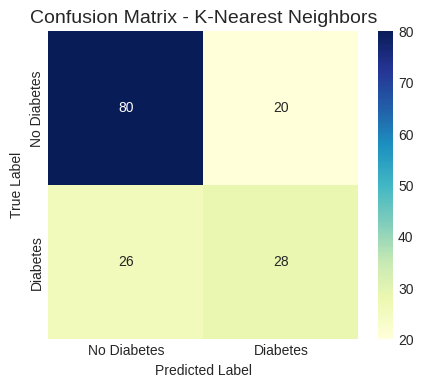

Confusion Matrix for K-Nearest Neighbors:

[[80 20]
 [26 28]]


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154


----------------------------------------

--- Training and Evaluating Decision Tree ---


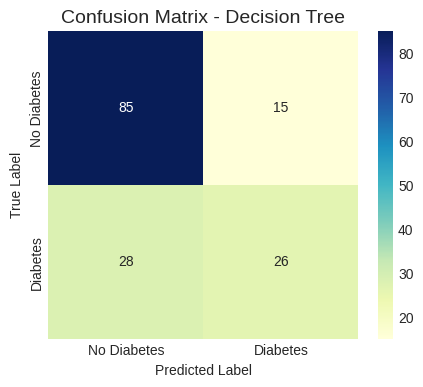

Confusion Matrix for Decision Tree:

[[85 15]
 [28 26]]


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154


----------------------------------------

--- Training and Evaluating Random Forest ---


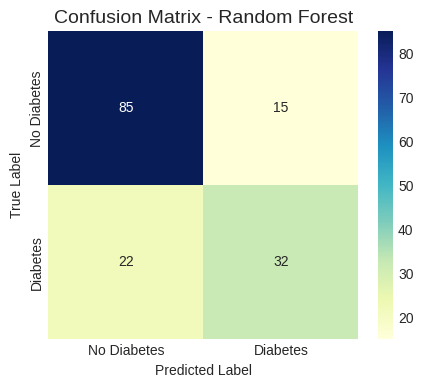

Confusion Matrix for Random Forest:

[[85 15]
 [22 32]]


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154


----------------------------------------



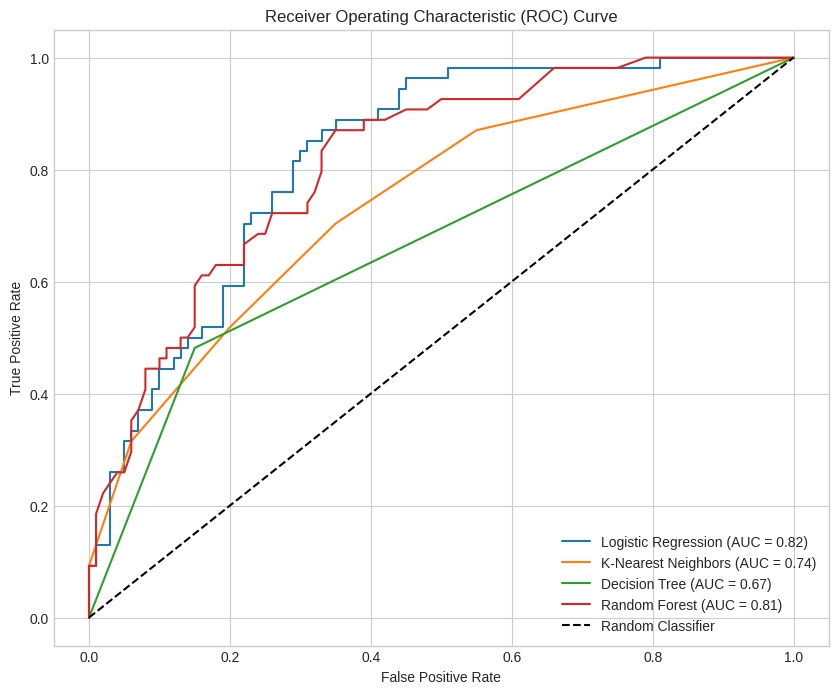

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ====================================================================================================
# 1. Load and Prepare Data
# ====================================================================================================

print("Mounting Google Drive...")
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/Colab Notebooks/diabetes.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset information:")
    df.info()
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the 'diabetes.csv' file is in the correct path in your Google Drive.")
    exit()

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ====================================================================================================
# 2. Feature Scaling
# ====================================================================================================

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData scaled and split into training and testing sets.")

# ====================================================================================================
# 3. Model Training and Evaluation
# ====================================================================================================

# Define the classifiers to be used
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Store ROC curve data for plotting
roc_data = {}

print("\n" + "="*50)
print("Starting Model Training and Evaluation")
print("="*50 + "\n")

for name, clf in classifiers.items():
    print(f"--- Training and Evaluating {name} ---")

    # Train the model
    clf.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)

    # Calculate performance metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',  # You can try 'coolwarm', 'Blues', 'viridis' etc.
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
    plt.title(f'Confusion Matrix - {name}', fontsize=14)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    class_report = classification_report(y_test, y_pred)

    # Calculate ROC curve and AUC
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    # Print the results
    print(f"Confusion Matrix for {name}:\n")
    print(conf_matrix)
    print("\n")
    print(f"Classification Report for {name}:\n")
    print(class_report)
    print("\n" + "-"*40 + "\n")

# ====================================================================================================
# 4. Performance Visualization (ROC Curve)
# ====================================================================================================

plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# Plot ROC curve for each classifier
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.2f})')

# Plot the diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
